In [72]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

In [26]:
Data=pd.read_excel(r"C:\Users\User_K\OneDrive\Desktop\credit_risk_dataset.xlsx")

In [27]:
Data

,Index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,433,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,434,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,435,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,436,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,437,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,33009,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,33010,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,33011,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,33012,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [28]:
Data.columns

Index(['Index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [29]:
Data.shape

(32581, 13)

<AxesSubplot:ylabel='None'>

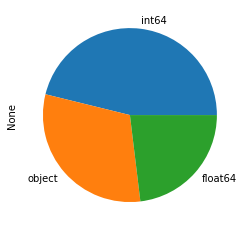

In [30]:
Data.dtypes.value_counts().plot.pie()

In [31]:
Data.dtypes

Index                           int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [32]:
Data.isna()

,Index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,False,False,False,False,False,False,False,False,False,False,False,False,False
32577,False,False,False,False,False,False,False,False,False,False,False,False,False
32578,False,False,False,False,False,False,False,False,False,False,False,False,False
32579,False,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
missing_rate=Data.isna().sum()/Data.shape[0]

In [34]:
missing_rate

Index                         0.000000
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.027470
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.095639
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

<AxesSubplot:>

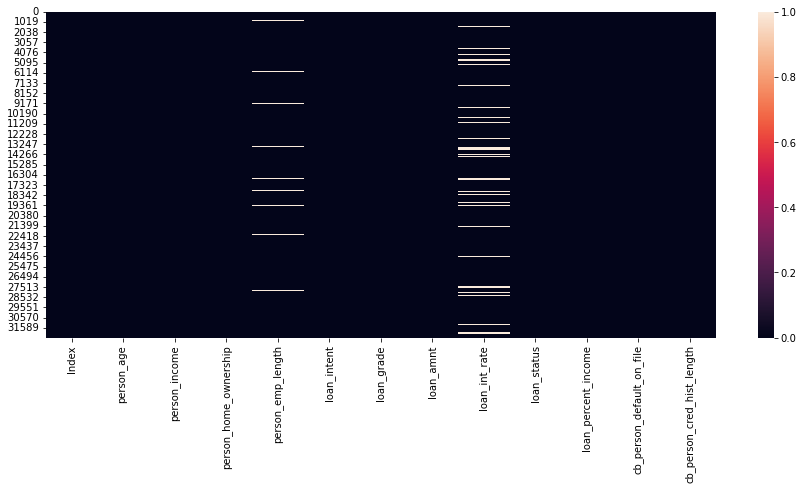

In [35]:
plt.figure(figsize=(15,6))
sns.heatmap(Data.isna())

On remarque qu'on a des données manquants au niveau de la variable "person_emp_length" qui refere aux nombres d'années d'emploie avec un pourcentage de 3% à peu pres ainsi que 9.5% à peu pres des données de la variable "loan_int_rate".

-Puisque on a une grande base de données et que le pourcentage des données manquants au niveau de la variable "person_emp_length" on va supprimer ces données manquants .

In [36]:
vars=['Index','loan_int_rate']
dt1= pd.DataFrame(data=Data,columns=vars)

In [37]:
dt1

,Index,loan_int_rate
0,433,16.02
1,434,11.14
2,435,12.87
3,436,15.23
4,437,14.27
...,...,...
32576,33009,13.16
32577,33010,7.49
32578,33011,10.99
32579,33012,11.48


In [38]:
Data.drop('loan_int_rate',1,inplace=True)

C:\Users\User_K\AppData\Local\Temp/ipykernel_10960/2267450805.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Data.drop('loan_int_rate',1,inplace=True)


In [39]:
Data

,Index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,433,22,59000,RENT,123.0,PERSONAL,D,35000,1,0.59,Y,3
1,434,21,9600,OWN,5.0,EDUCATION,B,1000,0,0.10,N,2
2,435,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3
3,436,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2
4,437,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,33009,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0,0.11,N,30
32577,33010,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0,0.15,N,19
32578,33011,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1,0.46,N,28
32579,33012,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0,0.10,N,26


In [40]:
Data=Data.dropna()

In [42]:
Data.isna().sum()

Index                         0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Notre Base est maintenant sans valeurs manquante mais aussi sans la variale 'loan_int_rate'. On a maintenant merger notre colonne et la base en utlisant Index comme cle. Puis on va essayer de traiter les valeurs manquantes au niveau de cette variable qui reste puis on va 

La variable qui reste est la variable de taux d'interet avec lequel le pret a été accordé. On va alors essayé de remplir cette variable. 

In [116]:
data[data['Index']==433]['person_emp_length']

Series([], Name: person_emp_length, dtype: float64)

In [118]:
data.loc[data['Index'] == 433]['person_emp_length'].values[0]

Series([], Name: person_emp_length, dtype: float64)

In [45]:
data=pd.merge(Data,dt1,on='Index',how='inner')

In [46]:
data

,Index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate
0,433,22,59000,RENT,123.0,PERSONAL,D,35000,1,0.59,Y,3,16.02
1,434,21,9600,OWN,5.0,EDUCATION,B,1000,0,0.10,N,2,11.14
2,435,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3,12.87
3,436,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2,15.23
4,437,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.55,Y,4,14.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31681,33009,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0,0.11,N,30,13.16
31682,33010,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0,0.15,N,19,7.49
31683,33011,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1,0.46,N,28,10.99
31684,33012,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0,0.10,N,26,11.48


In [47]:
imputer = KNNImputer(n_neighbors=2)

In [51]:
le = LabelEncoder()

In [59]:
data['person_home_ownership']=le.fit_transform(data['person_home_ownership'])
data['loan_intent']=le.fit_transform(data['loan_intent'])
data['loan_grade']=le.fit_transform(data['loan_grade'])
data['cb_person_default_on_file']=le.fit_transform(data['cb_person_default_on_file'])

In [60]:
data.dtypes

Index                           int64
person_age                      int64
person_income                   int64
person_home_ownership           int32
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
loan_int_rate                 float64
dtype: object

In [61]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [62]:
data

,Index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate
0,0.000000,0.016129,0.009173,1.000000,1.000000,0.8,0.500000,1.000000,1.0,0.710843,1.0,0.035714,0.595506
1,0.000031,0.008065,0.000934,0.666667,0.040650,0.2,0.166667,0.014493,0.0,0.120482,0.0,0.000000,0.321348
2,0.000061,0.040323,0.000934,0.000000,0.008130,0.6,0.333333,0.144928,1.0,0.686747,0.0,0.035714,0.418539
3,0.000092,0.024194,0.010257,1.000000,0.032520,0.6,0.333333,1.000000,1.0,0.638554,0.0,0.000000,0.551124
4,0.000123,0.032258,0.008406,1.000000,0.065041,0.6,0.333333,1.000000,1.0,0.662651,1.0,0.071429,0.497191
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31681,0.999877,0.298387,0.008172,0.000000,0.008130,0.8,0.333333,0.153623,0.0,0.132530,0.0,1.000000,0.434831
31682,0.999908,0.274194,0.019346,0.000000,0.032520,0.8,0.000000,0.496377,0.0,0.180723,0.0,0.607143,0.116292
31683,0.999939,0.362903,0.012008,1.000000,0.024390,0.4,0.166667,1.000000,1.0,0.554217,0.0,0.928571,0.312921
31684,0.999969,0.290323,0.024350,0.000000,0.040650,0.8,0.166667,0.420290,0.0,0.120482,0.0,0.857143,0.340449


In [63]:
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

In [64]:
data.isna().any()

Index                         False
person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length             False
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
loan_int_rate                 False
dtype: bool

In [66]:
data.isna().sum()

Index                         0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_int_rate                 0
dtype: int64

Maintenant qu'on a plus de valeurs manquantes, et comme j'ai checker labase de données sur excel (filtre) pour voir si les valeurs manquantes existent. On va commencer notre demarche ML

# EQUILIBRAGE DE DONNEES

In [77]:
PASDEFAUT = data[data['cb_person_default_on_file'] == 0]
DEFAUT  = data[data['cb_person_default_on_file'] == 1]
print(DEFAUT.shape)
print(PASDEFAUT.shape)

(5629, 13)
(26057, 13)


In [78]:
upsample = resample(DEFAUT,
             replace=True,
             n_samples=len(PASDEFAUT),
             random_state=42)

print(upsample.shape)

(26057, 13)


In [80]:
upsampled = pd.concat([PASDEFAUT, upsample])

0.0    26057
1.0    26057
Name: cb_person_default_on_file, dtype: int64


<AxesSubplot:ylabel='Type'>

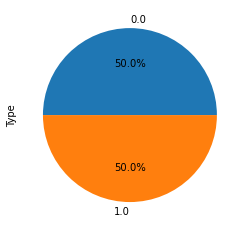

In [84]:
print(upsampled['cb_person_default_on_file'].value_counts())
upsampled.groupby('cb_person_default_on_file').size().plot(kind='pie',
                                       y = "DEFAUT",
                                       label = "Type",
                                       autopct='%1.1f%%')